In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

trip - Trip id <br>
date - Date, when trip was made <br>
dayPart - Day or Night <br>
exWeatherTag - Heat / Snow <br>
originLocation - Source location <br>
destinationLocation - Destination location <br>
distance - distance traveled <br>
type - Expedited or Not <br>
weight - weight carried by carriers <br>
packageType - Type of packages <br>
carrier - Name of the carriers <br>

In [2]:
# loading data into df variable from our csv file
df = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

In [3]:
# A first look into top 10 rows of our data
df.head(10)

,trip,date,dayPart,exWeatherTag,originLocation,destinationLocation,distance,type,weight,packageType,carrier,cost
0,t52712528,2017-09-06,night,NaN,S4,D7,2200,expedited,50,NaN,D,68.413152
1,t29859381,2017-10-21,night,NaN,S8,D1,1800,NaN,12,NaN,B,36.450649
2,t25702332,2017-07-15,night,NaN,S9,D5,2800,NaN,1,NaN,B,9.057939
3,t27713405,2017-10-22,day,NaN,S9,D7,3200,NaN,50,NaN,C,57.320087
4,t49439220,2019-12-11,day,snow,S9,D1,2000,NaN,43,NaN,B,77.263777
5,t40188190,2017-06-19,day,heat,S9,D7,3200,NaN,3,NaN,B,14.126206
6,t32905776,2017-02-09,day,NaN,S6,D1,1400,NaN,17,NaN,B,39.492590
7,t78320097,2018-10-01,day,NaN,S7,D4,2200,NaN,21,NaN,B,43.729438
8,t63539140,2018-11-26,night,NaN,S3,D7,2000,NaN,16,NaN,B,41.079265
9,t27682545,2019-05-26,night,NaN,S5,D7,2400,NaN,8,NaN,B,36.197725


Just from out first insight we can see that <strong>trip</strong> might have been used as a primary key and many values in <strong>packageType</strong> and <strong>Type</strong> is NaN. <br>
<strong>exWeatherTag</strong> column might also have many NaN values.

In [4]:
# Checking total number of rows and columns
df.shape

(38999, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38999 entries, 0 to 38998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   trip                 38999 non-null  object 
 1   date                 38999 non-null  object 
 2   dayPart              38999 non-null  object 
 3   exWeatherTag         4882 non-null   object 
 4   originLocation       38999 non-null  object 
 5   destinationLocation  38999 non-null  object 
 6   distance             38999 non-null  int64  
 7   type                 3748 non-null   object 
 8   weight               38999 non-null  int64  
 9   packageType          2500 non-null   object 
 10  carrier              38999 non-null  object 
 11  cost                 38999 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usage: 3.6+ MB


Here, we can see that total we have 38999 total observations(rows) and 12 columns or featues

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df['trip'].value_counts().sum()

38999

After counting the total number of unique values in trip column, we can see it is same as number of rows; which means every value is unique.

In [8]:
df['packageType'].isna().sum() / df.shape[0] * 100

93.58957921998

In [9]:
df['exWeatherTag'].isna().sum() / df.shape[0] * 100

87.48173030077695

In [10]:
df['type'].isna().sum() / df.shape[0] * 100

90.38949716659401

#### Trip is just acting as a unique identifier and will not have any significance to our model. It is better to remove it now.

#### approx 93, 87 and 90 percent of values are missing in packageType, exWeatherTag and type column. 

In [11]:
df.drop(['trip', 'packageType', 'exWeatherTag', 'type'], axis=1, inplace=True)

In [12]:
# looking at first 5 rows after removing trip column
df.head()

,date,dayPart,originLocation,destinationLocation,distance,weight,carrier,cost
0,2017-09-06,night,S4,D7,2200,50,D,68.413152
1,2017-10-21,night,S8,D1,1800,12,B,36.450649
2,2017-07-15,night,S9,D5,2800,1,B,9.057939
3,2017-10-22,day,S9,D7,3200,50,C,57.320087
4,2019-12-11,day,S9,D1,2000,43,B,77.263777


In [13]:
df.describe()

,date,distance,weight,cost
count,38999,38999.000000,38999.000000,38999.000000
mean,2018-06-29 10:36:51.933639168,2004.061643,42.293033,80.972210
min,2017-01-01 00:00:00,400.000000,1.000000,5.000000
25%,2017-09-29 00:00:00,1400.000000,13.000000,38.768742
50%,2018-06-28 00:00:00,2000.000000,25.000000,46.468476
75%,2019-03-28 00:00:00,2600.000000,39.000000,70.239797
max,2019-12-30 00:00:00,3600.000000,500.000000,2019.734797
std,NaN,728.996843,75.473752,180.715055


# Exploratory Data Analysis

Text(0.5, 1.0, 'Carrier')

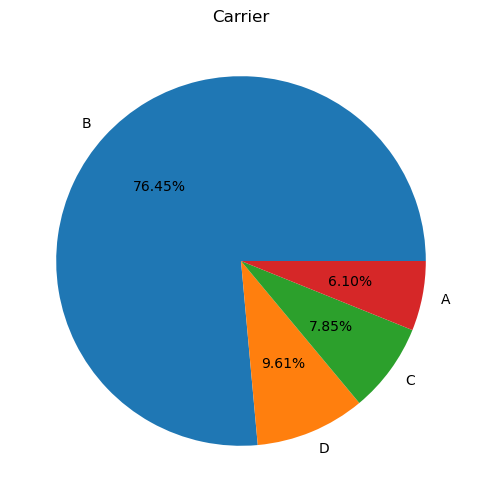

In [14]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(df['carrier'].value_counts(), labels=list(df['carrier'].value_counts().keys()), autopct='%1.2f%%' )
ax.set_title('Carrier')

In [15]:
df['originLocation'].value_counts()

originLocation
S3    4461
S5    4388
S6    4379
S8    4368
S4    4324
S1    4312
S9    4302
S7    4267
S2    4198
Name: count, dtype: int64

In [16]:
df['destinationLocation'].value_counts()

destinationLocation
D8    4471
D3    4386
D9    4379
D2    4335
D5    4334
D7    4297
D1    4284
D6    4279
D4    4234
Name: count, dtype: int64

Text(0, 0.5, 'Count')

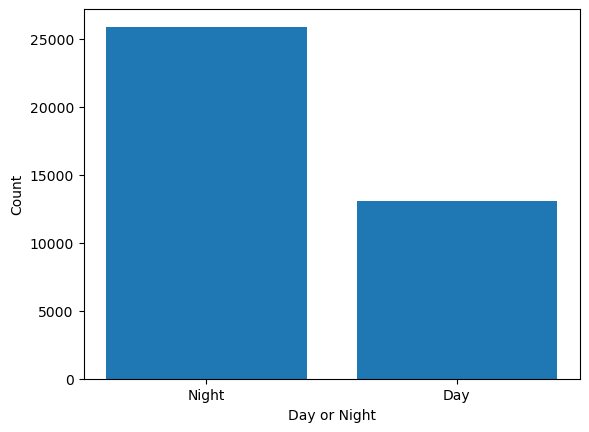

In [17]:
plt.bar(['Night', 'Day'], df['dayPart'].value_counts())
plt.xlabel('Day or Night')
plt.ylabel('Count')

In [26]:
df[['distance', 'weight', 'cost']].corr()

,distance,weight,cost
distance,1.000000,-0.004986,0.006427
weight,-0.004986,1.000000,0.859548
cost,0.006427,0.859548,1.000000


C:\Users\rojit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


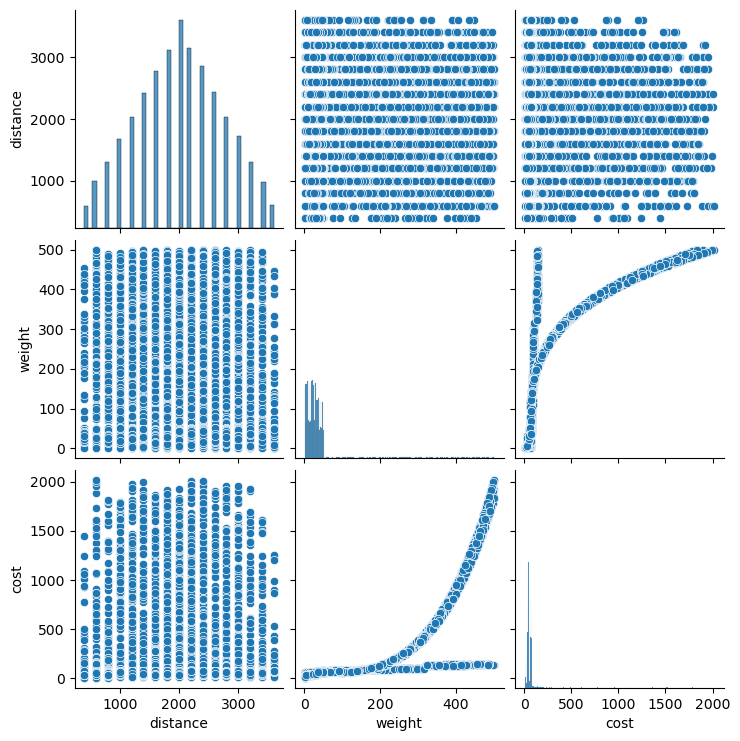

In [25]:
sns.pairplot(df)